In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,NaN,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,NaN,8.0,1.0,3.0,4.0,3.0,NaN,1.0
4,4.0,1.0,1.0,3.0,2.0,NaN,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
679,2.0,1.0,NaN,1.0,2.0,1.0,3.0,1.0,NaN
680,5.0,10.0,10.0,10.0,4.0,NaN,5.0,6.0,3.0
681,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	64
float64		column 2	80
float64		column 3	32
float64		column 4	32
float64		column 5	66
float64		column 6	66
float64		column 7	98
float64		column 8	82
float64		column 9	64


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,619.000000,603.000000,651.000000,651.000000,617.000000,617.000000,585.000000,601.000000,619.000000
mean,4.387722,3.014925,3.190476,2.788018,3.124797,3.474878,3.317949,2.730449,1.579968
std,2.738597,2.948863,2.938964,2.824820,2.104182,3.586107,2.264550,2.951930,1.724932
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

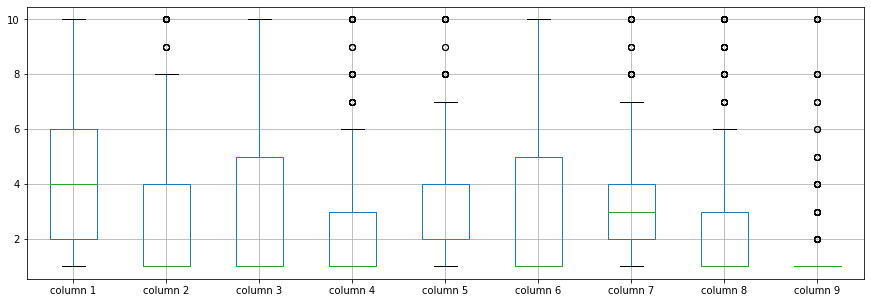

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.387722
column 2    3.014925
column 3    3.190476
column 4    2.788018
column 5    3.124797
column 6    3.474878
column 7    3.317949
column 8    2.730449
column 9    1.579968
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.612526,0.629101,0.489174,0.474525,0.569264,0.531581,0.518433,0.344232
column 2,0.612526,1.000000,0.905743,0.714594,0.740555,0.656255,0.737382,0.696506,0.445523
column 3,0.629101,0.905743,1.000000,0.686414,0.700487,0.683955,0.709376,0.705232,0.421954
column 4,0.489174,0.714594,0.686414,1.000000,0.560956,0.659438,0.653064,0.584085,0.411117
column 5,0.474525,0.740555,0.700487,0.560956,1.000000,0.562989,0.581434,0.611247,0.455670
column 6,0.569264,0.656255,0.683955,0.659438,0.562989,1.000000,0.632857,0.581142,0.326302
column 7,0.531581,0.737382,0.709376,0.653064,0.581434,0.632857,1.000000,0.658580,0.324472
column 8,0.518433,0.696506,0.705232,0.584085,0.611247,0.581142,0.658580,1.000000,0.450302
column 9,0.344232,0.445523,0.421954,0.411117,0.455670,0.326302,0.324472,0.450302,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+88,9+88+88,9+88+88,9+88+88+88+88,9+88+88+88+88+88,9+88+88+88+88+88+88,9+88+88+88+88+88,9+88+88+88+88,9+88+88+88,9+88+88,9+88,9], vae_layer = False, seed = 880)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 32.403398105076384
Epoch: 1 , loss: 31.531192779541016
Epoch: 2 , loss: 27.99129072825114
Epoch: 3 , loss: 27.554993720281693
Epoch: 4 , loss: 26.668344997224352
Epoch: 5 , loss: 26.387525513058616
Epoch: 6 , loss: 26.303756804693315
Epoch: 7 , loss: 26.127287433260964
Epoch: 8 , loss: 26.186053503127326
Epoch: 9 , loss: 25.996124131338938
Epoch: 10 , loss: 25.711487270536878
Epoch: 11 , loss: 25.654834111531574
Epoch: 12 , loss: 25.491872333344958
Epoch: 13 , loss: 25.361999784197128
Epoch: 14 , loss: 24.602759497506277
Epoch: 15 , loss: 25.09389949980236
Epoch: 16 , loss: 24.72476818448021
Epoch: 17 , loss: 24.276455833798362
Epoch: 18 , loss: 24.443105334327335
Epoch: 19 , loss: 23.935069220406668
Epoch: 20 , loss: 24.28440150760469
Epoch: 21 , loss: 23.956025078183128
Epoch: 22 , loss: 23.99893084026518
Epoch: 23 , loss: 24.072856948489235
Epoch: 24 , loss: 24.285838717506046
Epoch: 25 , loss: 23.92

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.000000
column 2    1.000000
column 3    1.000000
column 4    1.000000
column 5    2.000000
column 6    2.421019
column 7    2.000000
column 8    1.000000
column 9    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000
2,0.0,0.011756,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000
3,0.0,-5.756004,0.000000,0.0,0.000000,0.000000,0.0,-5.005527,0.00000
4,0.0,0.000000,0.000000,0.0,0.000000,0.407669,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...
678,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000
679,0.0,0.000000,-0.070306,0.0,0.000000,0.000000,0.0,0.000000,-0.51164
680,0.0,0.000000,0.000000,0.0,0.000000,-4.593798,0.0,0.000000,0.00000
681,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(85.26236150472025, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.2542654096941975

In [18]:
new_df.iloc[66,:]

column 1    3.504145
column 2    3.000000
column 3    3.000000
column 4    2.000000
column 5    2.000000
column 6    1.000000
column 7    7.000000
column 8    2.000000
column 9    1.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.000000,1.000000,1.0,2.000000,1.000000,3.0,1.000000,1.00000
1,5.0,4.000000,4.000000,5.0,7.000000,10.000000,3.0,2.000000,1.00000
2,3.0,1.011756,1.000000,1.0,2.000000,2.000000,3.0,1.000000,1.00000
3,6.0,2.243996,8.000000,1.0,3.000000,4.000000,3.0,1.994473,1.00000
4,4.0,1.000000,1.000000,3.0,2.000000,1.407669,3.0,1.000000,1.00000
...,...,...,...,...,...,...,...,...,...
678,3.0,1.000000,1.000000,1.0,2.000000,1.000000,2.0,1.000000,1.00000
679,2.0,1.000000,0.929694,1.0,2.000000,1.000000,3.0,1.000000,0.48836
680,5.0,10.000000,10.000000,10.0,4.000000,5.406202,5.0,6.000000,3.00000
681,1.0,1.000000,1.000000,3.0,2.000000,1.000000,1.0,1.000000,1.00000


In [20]:
imputations[-1].to_excel("BCW_NL_10(imp).xlsx", index=False, header=False)